## Tennis Ace

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

## About Project

I will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world.

#### Task 1

Import Python libraries and load data into DataFrame `df`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


#### Task 2 - summary statistics

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

Identifying Data

- Player: name of the tennis player
- Year: year data was recorded

Service Game Columns (Offensive)

- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)

- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player

Outcomes

- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

In [3]:
df.corr() # check correlation between variables 

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


In [4]:
df.isna().any() # check for NaN values

Player                        False
Year                          False
FirstServe                    False
FirstServePointsWon           False
FirstServeReturnPointsWon     False
SecondServePointsWon          False
SecondServeReturnPointsWon    False
Aces                          False
BreakPointsConverted          False
BreakPointsFaced              False
BreakPointsOpportunities      False
BreakPointsSaved              False
DoubleFaults                  False
ReturnGamesPlayed             False
ReturnGamesWon                False
ReturnPointsWon               False
ServiceGamesPlayed            False
ServiceGamesWon               False
TotalPointsWon                False
TotalServicePointsWon         False
Wins                          False
Losses                        False
Winnings                      False
Ranking                       False
dtype: bool

#### Task 3 - Perform exploratory analysis on the data by plotting different features against the different outcomes

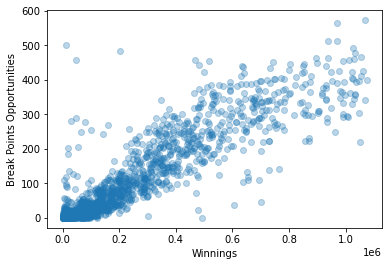

In [5]:
plt.scatter(df['Winnings'], df['BreakPointsOpportunities'], alpha=0.3)
plt.xlabel('Winnings')
plt.ylabel('Break Points Opportunities')
plt.show()

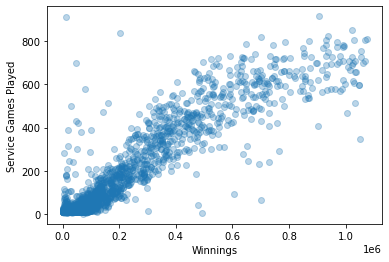

In [6]:
plt.scatter(df['Winnings'], df['ServiceGamesPlayed'], alpha=0.3)
plt.xlabel('Winnings')
plt.ylabel('Service Games Played')
plt.show()

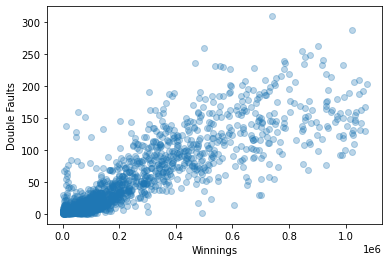

In [7]:
plt.scatter(df['Winnings'], df['DoubleFaults'], alpha=0.3)
plt.xlabel('Winnings')
plt.ylabel('Double Faults')
plt.show()

#### Task 4 - Use one feature from the dataset to build a single feature linear regression model on the data

In [8]:
features = df['FirstServeReturnPointsWon']
features = features.values.reshape(-1,1)
outcome = df['Winnings']
outcome = outcome.values.reshape(-1,1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
model.score(x_test, y_test)

0.06622957003424712

In [12]:
y_predict = model.predict(x_test)

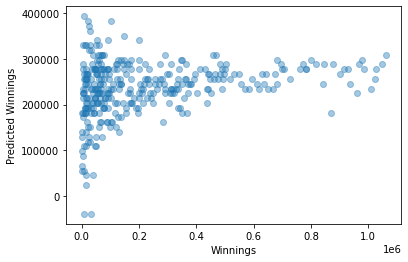

In [13]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

#### Task 5 - Create a few more linear regression models that use one feature to predict one of the outcomes

In [14]:
f_1 = df['SecondServePointsWon']
f_1 = f_1.values.reshape(-1, 1)
o_1 = df['Winnings']
o_1 = o_1.values.reshape(-1, 1)

In [15]:
f_1_train, f_1_test, o_1_train, o_1_test = train_test_split(f_1, o_1, train_size = 0.8, test_size = 0.2)

In [16]:
m1 = LinearRegression()
m1.fit(f_1_train, o_1_train)

LinearRegression()

In [17]:
m1.score(f_1_test, o_1_test)

0.055163007282898247

In [18]:
y_predict1 = m1.predict(f_1_test)

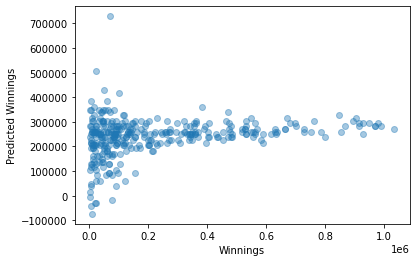

In [19]:
plt.scatter(o_1_test, y_predict1, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

In [20]:
f_2 = df['SecondServeReturnPointsWon']
f_2 = f_2.values.reshape(-1, 1)
o_2 = df['Winnings']
o_2 = o_2.values.reshape(-1, 1)

In [21]:
f_2_train, f_2_test, o_2_train, o_2_test = train_test_split(f_2, o_2, train_size = 0.8, test_size = 0.2)

In [22]:
m2 = LinearRegression()
m2.fit(f_2_train, o_2_train)

LinearRegression()

In [23]:
m2.score(f_2_test, o_2_test)

0.026617313257011777

In [24]:
y_predict2 = m2.predict(f_2_test)

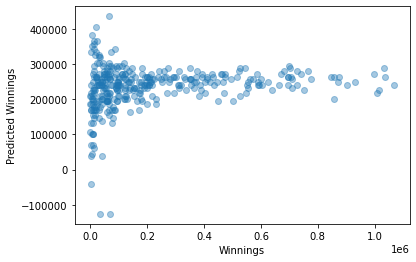

In [25]:
plt.scatter(o_2_test, y_predict2, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

#### Task 6 - Create a few linear regression models that use two features to predict yearly earnings

In [26]:
features = df[['BreakPointsOpportunities',
'FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

In [27]:
x3_train, x3_test, y3_train, y3_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2)

In [28]:
m3 = LinearRegression()
m3.fit(x3_train, y3_train)

LinearRegression()

In [29]:
m3.score(x3_test, y3_test)

0.790279972125537

In [30]:
y_predict3 = m3.predict(x3_test)

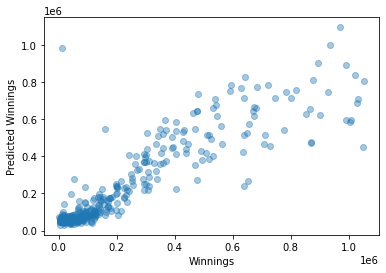

In [31]:
plt.scatter(y3_test, y_predict3, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

In [32]:
features = df[['ServiceGamesPlayed',
'ServiceGamesWon']]
outcome = df[['Winnings']]

In [33]:
x4_train, x4_test, y4_train, y4_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2)

In [34]:
m4 = LinearRegression()
m4.fit(x4_train, y4_train)

LinearRegression()

In [35]:
m4.score(x4_test, y4_test)

0.8382011559236494

In [36]:
y_predict4 = m4.predict(x4_test)

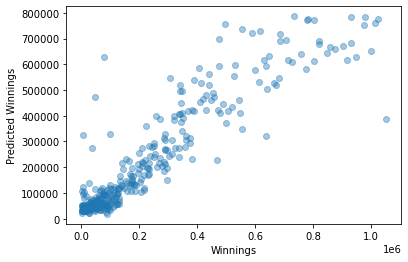

In [37]:
plt.scatter(y4_test, y_predict4, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()

#### Task 7 - Create a few linear regression models that use multiple features to predict yearly earnings

In [38]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df['Winnings']

In [39]:
x5_train, x5_test, y5_train, y5_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2)

In [40]:
m5 = LinearRegression()
m5.fit(x5_train, y5_train)

LinearRegression()

In [41]:
m5.score(x5_test, y5_test)

0.8301555005459975

In [42]:
y5_predict = m5.predict(x5_test)

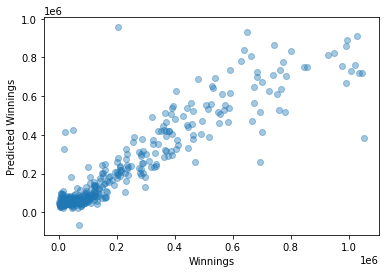

In [43]:
plt.scatter(y5_test, y5_predict, alpha=0.4)
plt.xlabel('Winnings')
plt.ylabel('Predicted Winnings')
plt.show()